$\large Logica \  Computacional\ 26-Outubro-2023 \ LCC$

$\textbf{Grupo 06:}$

* João Manuel Franqueira da Silva, A91638
* Eduardo Manuel Sousa Pereira, A70619

$\huge TP2 - Problema\ 1 $

   O algoritmo estendido de Euclides (EXA) aceita dois inteiros constantes  $\,a,b>0\,$  e devolve inteiros $r,s,t\,$ tais que  $\,a*s + b*t = r\,$  e  $\,r = \gcd(a,b)\,$. 
    Para além das variáveis $\,r,s,t\,$ o código requer 3 variáveis adicionais $\,r',s',t'\,$ que representam os valores de $\,r,s,t\,$ no “próximo estado”.   

        INPUT  a, b
        assume  a > 0 and b > 0
    0:  r, r', s, s', t, t' = a, b, 1, 0, 0, 1
    1:  while r' != 0    
           q = r div r'
    2:     r, r', s, s', t, t' = r', r − q × r', s', s − q × s', t', t − q × t' 
    3:  OUTPUT r, s, t

In [1]:
from pysmt.shortcuts import *
import pysmt.typing as types
import random as rn
from pysmt.typing import BOOL, REAL, INT, BVType, STRING
from IPython.display import Latex

${\normalsize\text{Construção de um FOTS usando BitVector de tamanho $n$ que descreva o comportamento do programa.}}$ 

Vamos começar por declarar as variáveis relativas ao nosso problema.

Podemos ainda considerar uma variável $pc$ que indicará a instrução em que nos encontramos.

In [2]:
n = 32     #número de bits das variáveis

def declare(i):
    state = {}    
    state['pc'] = Symbol('pc'+str(i),BVType(n))
    state['r'] = Symbol('r'+str(i),BVType(n))
    state['s'] = Symbol('s'+str(i),BVType(n))
    state['t'] = Symbol('t'+str(i),BVType(n))
    state['q'] = Symbol('q'+str(i),BVType(n))
    state['r_'] = Symbol('r_'+str(i),BVType(n))
    state['s_'] = Symbol('s_'+str(i),BVType(n))
    state['t_'] = Symbol('t_'+str(i),BVType(n))
    return state

Para definir o predicado $init$, que dado um estado e dois inteiros $a$ e $b$ verifica se este é um estado inicial válido, precisamos de observar a pré-condição do nosso programa:

$ a > 0 \quad \text{\(\land\)} \quad b > 0 \quad \text{\(\land\)} \quad r=a \quad \text{\(\land\)} \quad r\_=b \quad \text{\(\land\)} \quad s=1 \quad \text{\(\land\)} \quad s\_=0 \quad \text{\(\land\)} \quad t=0 \quad \text{\(\land\)} \quad t\_=1 \quad \text{\(\land\)} \quad pc=0$

In [3]:
def init(state,a,b):
    A=BVUGT(state['r'],SBV(0,n))
    B=BVUGT(state['r_'],SBV(0,n))
    C=Equals(state['pc'],SBV(0,n))
    D=Equals(state['r'],SBV(a,n))
    E=Equals(state['s'],SBV(1,n))
    F=Equals(state['t'],SBV(0,n)) 
    G=Equals(state['r_'],SBV(b,n))
    H=Equals(state['s_'],SBV(0,n))
    I=Equals(state['t_'],SBV(1,n))
    J=Equals(state['q'],SBV(0,n))
    r=And(A,B,C,D,E,F,G,H,I,J)
    
    return r

Definimos agora a função transição que recebe dois estados como argumento, o atual $(curr)$ e o que pretendemos transitar para $(prox)$, e verifica se esses dois estados se referem a uma transição válida do programa.

Referindo às váriaveis do estado $curr$ por: $pc$, $r$, $r\_$, $s$, $s\_$, $t$, $t\_$, $q$

E do estado $prox$ por: $pc'$, $r'$, $r\_'$, $s'$, $s\_'$, $t'$, $t\_'$, $q'$

Temos então as seguintes transições possiveis:


Quando a variável $pc$ tiver valor 0, no próximo estado do programa iremos estar na condição do ciclo while, ou seja, $pc '$ vai ter o valor 1 e todas as variáveis mantêm o mesmo valor.

- $pc=0\quad \text{\(\land\)} \quad pc'=1 \quad \text{\(\land\)} \quad r'=r \quad \text{\(\land\)} \quad r\_'=r\_ \quad \text{\(\land\)} \quad s'=s \quad \text{\(\land\)} \quad s\_'=s\_ \quad \text{\(\land\)} \quad t'=t \quad \text{\(\land\)} \quad t\_'=t\_$

Quando a variável $pc$ tiver o valor 1 podemos prosseguir para dois estados: 
Se $r$$\text{\(\neq\)}$0 entramos dentro do ciclo e $pc'$ terá o valor 2, e os valores das variáveis são mantidas.
    
- $pc=1\quad \text{\(\land\)} \quad pc'=2 \quad \text{\(\land\)} \quad r\_\text{\(\neq\)}0 \quad \text{\(\land\)} \quad r'=r \quad \text{\(\land\)} \quad r\_'=r\_ \quad \text{\(\land\)} \quad s'=s \quad \text{\(\land\)} \quad s\_'=s\_ \quad \text{\(\land\)} \quad t'=t \quad \text{\(\land\)} \quad t\_'=t\_$
   
Caso contrário, a condição do ciclo não é satisfeita, e $pc'$ terá o valor 3 e os valores das variáveis são mantidos.

- $pc=1\quad \text{\(\land\)} \quad pc'=3 \quad \text{\(\land\)} \quad r\_=0 \quad \text{\(\land\)} \quad r'=r \quad \text{\(\land\)} \quad r\_'=r\_ \quad \text{\(\land\)} \quad s'=s \quad \text{\(\land\)} \quad s\_'=s\_ \quad \text{\(\land\)} \quad t'=t \quad \text{\(\land\)} \quad t\_'=t\_$

Quando $pc$ tiver o valor 2, $pc'$ volta à linha 1 e temos que efetuar as operações.

- $pc=2\quad \text{\(\land\)} \quad pc'=1 \quad \text{\(\land\)} \quad r\_!=0 \quad \text{\(\land\)} \quad q=r/r\_ \quad \text{\(\land\)} \quad r\_'=r-(q * r\_) \quad \text{\(\land\)} \quad s\_'=s-(q * s\_) \quad \text{\(\land\)} \quad t\_'=t-(q * t\_) $


Por último podemos definir ainda uma transição do estado final para ele próprio, em que o $pc$, tal como as variavéis se mantêm.

- $pc=3\quad \text{\(\land\)} \quad pc'=3 \quad \text{\(\land\)} \quad r'=r \quad \text{\(\land\)} \quad r\_'=r\_ \quad \text{\(\land\)} \quad s'=s \quad \text{\(\land\)} \quad s\_'=s\_ \quad \text{\(\land\)} \quad t'=t \quad \text{\(\land\)} \quad t\_'=t\_$

In [4]:
def trans(curr,prox):
    #0 - 1
    A=Equals(curr['pc'],SBV(0,n))
    B=Equals(prox['pc'],SBV(1,n))
    C=Equals(prox['r'],curr['r'])
    D=Equals(prox['s'],curr['s'])
    E=Equals(prox['t'],curr['t'])
    F=Equals(prox['r_'],curr['r_'])
    G=Equals(prox['s_'],curr['s_'])
    H=Equals(prox['t_'],curr['t_'])
    I=Equals(prox['q'],curr['q'])
    t01=And(A,B,C,D,E,F,G,H,I)
    
    #-----------------------
    #1 - 2
    A=Equals(curr['pc'],SBV(1,n))
    B=Equals(prox['pc'],SBV(2,n))
    C=Equals(prox['r'],curr['r'])
    D=Equals(prox['s'],curr['s'])
    E=Equals(prox['t'],curr['t'])
    F=Equals(prox['r_'],curr['r_'])
    G=Equals(prox['s_'],curr['s_'])
    H=Equals(prox['t_'],curr['t_'])
    z=Not(Equals(curr['r_'],SBV(0,n)))
    t12=And(A,B,C,D,E,F,G,H,z)
    
    #-----------------------
    #2 - 1  
    A=Equals(curr['pc'],SBV(2,n))
    B=Equals(prox['pc'],SBV(1,n))
    D=Equals(prox['q'],BVSDiv(curr['r'],curr['r_']))
    E=Equals(prox['r_'],BVSub(curr['r'],BVMul(prox['q'],curr['r_'])))
    F=Equals(prox['s_'],BVSub(curr['s'],BVMul(prox['q'],curr['s_'])))
    G=Equals(prox['t_'],BVSub(curr['t'],BVMul(prox['q'],curr['t_'])))
    H=Equals(prox['r'],curr['r_'])
    I=Equals(prox['s'],curr['s_'])
    J=Equals(prox['t'],curr['t_'])
    t21=And(A,B,D,E,F,G,H,I,J)
    
    #-----------------------
    #1 - 3
    A=Equals(curr['pc'],SBV(1,n))
    B=Equals(prox['pc'],SBV(3,n))
    C=Equals(curr['r_'],SBV(0,n))
    D=Equals(prox['r'],curr['r'])
    E=Equals(prox['s'],curr['s'])
    F=Equals(prox['t'],curr['t'])
    G=Equals(prox['r_'],curr['r_'])
    H=Equals(prox['s_'],curr['s_'])
    I=Equals(prox['t_'],curr['t_'])
    J=Equals(prox['q'],curr['q'])
    t13=And(A,B,C,D,E,F,G,H,I,J)
    
    #-----------------------
    #3 - 3
    A=Equals(curr['pc'],SBV(3,n))
    B=Equals(prox['pc'],SBV(3,n))
    C=Equals(prox['r'],curr['r'])
    D=Equals(prox['s'],curr['s'])
    E=Equals(prox['t'],curr['t'])
    F=Equals(prox['r_'],curr['r_'])
    G=Equals(prox['s_'],curr['s_'])
    H=Equals(prox['t_'],curr['t_'])
    I=Equals(prox['q'],curr['q'])
    t33=And(A,B,C,D,E,F,G,H,I)
    
    return Or(t01,t12,t21,t13,t33)

Por último, temos a função $gera\_traco$, que cria uma lista "traço" de $k$ estados em que:

- Aplicamos a função init ao primeiro estado: $init (traco[0])$

- Para todos estado consecutivos $S$, $S'$, aplicamos a função transição: $\forall_{i=0}^{k-2}$ $trans (traco[i], traco[i+1])$

In [5]:
def gera_traco(declare,init,trans,k,a,b):
    if(a>0 and b>0):
        with Solver() as solver:

            traco = [declare(i) for i in range(k)]

            solver.add_assertion(init(traco[0],a,b))

            for i in range(k-1):
                solver.add_assertion(trans(traco[i], traco[i+1]))

            if solver.solve():
                print("> is sat")
                for i, s in enumerate(traco):
                    print("Estado pc: %s"%(solver.get_value(s['pc']).bv_signed_value()))
                    print("Valor R: %s"%(solver.get_value(s['r']).bv_signed_value()))
                    print("Valor R_: %s"%(solver.get_value(s['r_']).bv_signed_value()))
                    print("Valor S: %s"%(solver.get_value(s['s']).bv_signed_value()))
                    print("Valor S_: %s"%(solver.get_value(s['s_']).bv_signed_value()))
                    print("Valor T: %s"%(solver.get_value(s['t']).bv_signed_value()))
                    print("Valor T_: %s"%(solver.get_value(s['t_']).bv_signed_value()))
                    print("Valor Q: %s"%(solver.get_value(s['q']).bv_signed_value()))   
                    print("")
            else:
                print("> Not feasible.")

${\normalsize\text{Provar que o programa nunca atinge o estado de erro.}}$ 

2. Considere estado de erro quando $\,r=0\,$ ou alguma das variáveis atinge o “overflow”. Prove que o programa nunca atinge o estado de erro.

Como queremos provar que em nenhum estado a variável $r$ atinge o valor 0, podemos introduzir um predicado que dado um estado $S$, testa se $S(r)==0$.

In [6]:
def r_dif_zero(state):
    return Not(Equals(state['r'],SBV(0,n)))

Também devemos considerar como erro um estado em que alguma variável atinge o overflow, ou seja, em que alguma variável seja maior do que o maior número representável com 32 bits.

Introduzimos então um predicado que dado um estado $S$, nos diz se alguma variável atingiu overflow.

In [7]:
def no_overflow(state):     
    N= BV(2**n-1,width=n)
    A=Or(
        BVUGT(state['r'], N),
        BVUGT(state['s'], N),
        BVUGT(state['t'], N),
        BVUGT(state['r_'], N),
        BVUGT(state['s_'], N),
        BVUGT(state['t_'], N),
        BVUGT(state['q'], N)
    )
    return Not(A) 

Combinando $r\_dif\_zero$ e $no\_overflow$, temos que um estado $S$, nao é estado de erro, quando ambos os predicados validam $S$.

Daí, o predicado $nao\_erro$.

In [8]:
def nao_erro(state):
    return And(r_dif_zero(state),no_overflow(state))

Queremos verificar que o programa nunca atinge um estado de erro, para verificar esta propriedade, podemos utilizar o método da k_indução que consiste em:

- $\phi$ é válido nos estados iniciais, ou seja, $\mathit{init}(s) \rightarrow \phi(s)$

- Para qualquer estado, assumindo que $\phi$ é verdade, se executarmos uma transição, $\phi$ continua a ser verdade no próximo estado, ou seja, $\phi(s) \wedge \mathit{trans}(s,s') \rightarrow \phi(s')$.

Um processo parecido com este seria generalizar a indução assumindo no passo indutivo que o invariante é válido nos $k$ estados anteriores. 

In [9]:
def k_induction_always(declare,init,trans,inv,k,a,b):
    if(a>0 and b>0):
        with Solver() as solver:
            s = [declare(i) for i in range(k)]
            solver.add_assertion(init(s[0],a,b))
            for i in range(k-1):
                solver.add_assertion(trans(s[i],s[i+1]))

            for i in range(k):
                solver.push()
                solver.add_assertion(Not(inv(s[i])))
                if solver.solve():
                    print(f"> Contradição! O invariante não se verifica nos k estados iniciais.")
                    for st in s:
                        print(f" pc = {solver.get_value(st['pc']).bv_signed_value()}",end=" ")
                        print(f" r = {solver.get_value(st['r']).bv_signed_value()}",end=" ")
                        print(f" s = {solver.get_value(st['s']).bv_signed_value()}",end=" ")
                        print(f" t = {solver.get_value(st['t']).bv_signed_value()}")
                        print(f" r_ = {solver.get_value(st['r_']).bv_signed_value()}",end=" ")
                        print(f" s_ = {solver.get_value(st['s_']).bv_signed_value()}",end=" ")
                        print(f" t_ = {solver.get_value(st['t_']).bv_signed_value()}",end=" ")
                        print(f" q = {solver.get_value(st['q']).bv_signed_value()}",end=" ")
                        print("---------------------------------------------------------")
                        print()

                    return
                solver.pop()

            s2 = [declare(i+k) for i in range(k+1)]

            for i in range(k):
                solver.add_assertion(inv(s2[i]))
                solver.add_assertion(trans(s2[i],s2[i+1]))

            solver.add_assertion(Not(inv(s2[-1])))

            if solver.solve():
                print(f"> Contradição! O passo indutivo não se verifica.")
                return
            print(f"> A propriedade verifica-se por k-indução (k={k}).")

${\normalsize\text{Prove que a relação de Bézout, $ a*s + b*t = r $ é um invariante do algoritmo.}}$ 

Esta relação é traduzida com o seguinte predicado:

In [10]:
def bezout(state,a,b): 
    return Equals(state['r'],BVAdd(BVMul(state['s'],SBV(a,n)),BVMul(state['t'],SBV(b,n))))

Para provar este invariante, vamos usar o método $bmc\_always$ em que a cada iteração, verifica, para dois estados consecutivos $S$ e $S'$ tal que $invariante(S)$ e $trans(S,S')$, se $\text{\(\neg\)}$ $invariante(S')$ é válido.

In [11]:
def bmc_always(declare,init,trans,inv,K,a,b):
    if(a>0 and b>0):
        with Solver() as solver:
            states = [declare(i) for i in range(K)]
            solver.add_assertion(init(states[0],a,b))

            for k in range(K):
                if k>0:
                    solver.add_assertion(trans(states[k-1], states[k]))

                solver.push()
                solver.add_assertion(Not(inv(states[k],a,b)))

                if solver.solve():
                    print(f"> Invariante não se verifica para os primeiros {k+1} estados.")
                    return
                else:
                    if k==K-1:
                        print(f"> Invariante verifica-se para os primeiros {K} estados.")
                    else:
                        solver.pop()

In [12]:
gera_traco(declare,init,trans,7,3,6)

> is sat
Estado pc: 0
Valor R: 3
Valor R_: 6
Valor S: 1
Valor S_: 0
Valor T: 0
Valor T_: 1
Valor Q: 0

Estado pc: 1
Valor R: 3
Valor R_: 6
Valor S: 1
Valor S_: 0
Valor T: 0
Valor T_: 1
Valor Q: 0

Estado pc: 2
Valor R: 3
Valor R_: 6
Valor S: 1
Valor S_: 0
Valor T: 0
Valor T_: 1
Valor Q: 0

Estado pc: 1
Valor R: 6
Valor R_: 3
Valor S: 0
Valor S_: 1
Valor T: 1
Valor T_: 0
Valor Q: 0

Estado pc: 2
Valor R: 6
Valor R_: 3
Valor S: 0
Valor S_: 1
Valor T: 1
Valor T_: 0
Valor Q: 0

Estado pc: 1
Valor R: 3
Valor R_: 0
Valor S: 1
Valor S_: -2
Valor T: 0
Valor T_: 1
Valor Q: 2

Estado pc: 3
Valor R: 3
Valor R_: 0
Valor S: 1
Valor S_: -2
Valor T: 0
Valor T_: 1
Valor Q: 2



In [13]:
k_induction_always(declare,init,trans,nao_erro,7,1,5)

> A propriedade verifica-se por k-indução (k=7).


In [14]:
bmc_always(declare,init,trans,bezout,20,43,5)

> Invariante verifica-se para os primeiros 20 estados.


${\LARGE\text{Impressão dos resultados obtidos}}$

$gera\_traco(declare,init,trans,7,3,6)$

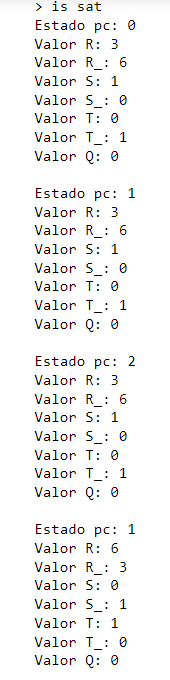

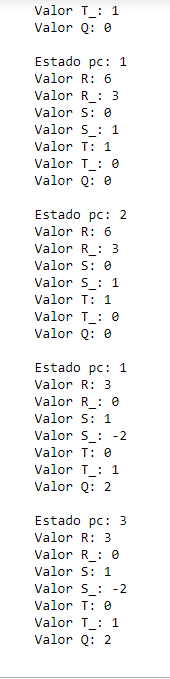

$k\_induction\_always(declare,init,trans,nao\_erro,7,1,5)$

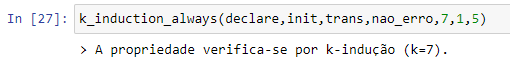

$bmc\_always(declare,init,trans,bezout,20,43,5)$

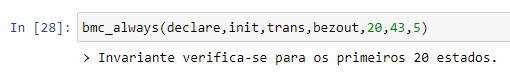